In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/preprocessed_data.csv')

In [2]:
df.head()

,cancer_type,title,username,date,content,comments
0,Anal Cancer,Getting BACK to living!!!!,drpearl,2023-07-02 18:33:36,hi checking one year diagnosis treatment ended...,['hi drpearl lovely hear changed thinking nega...
1,Anal Cancer,long term side effects/Anyone know if my teeth...,Psmall,2021-12-06 17:14:35,hello new member went treatment year ago fluor...,['hi dont usually post board happened see teet...
2,Anal Cancer,Marijuana for pain?,goji,2024-01-29 20:07:25,ha anyone success marijuana gummies probably p...,['hi im researching thc cbd want get gabapenti...
3,Anal Cancer,Advice and Help,CanadaNorth,2024-01-31 03:36:05,mom year old went colonoscopy march colonoscop...,[]
4,Anal Cancer,10 years and grateful,sandysp,2021-08-31 00:57:48,hi used board every day wa lifeline wsa fright...,['hi glad see time helped along path wa diagno...


In [3]:
df.tail()

,cancer_type,title,username,date,content,comments
3845,Uterine/Endometrial Cancer,carrot juice for headache,Cucu me,2015-08-20 03:23:42,found drinking carrot juice daily cancer solve...,['wa wondering would mind telling much kind or...
3846,Uterine/Endometrial Cancer,CT & PET in Washington State,SNOWFLAKE55,2023-02-26 15:22:36,wondering privately accessible radiology clini...,['hi pretty specific question wanted informati...
3847,Uterine/Endometrial Cancer,Anxious,Connie1950,2023-01-28 15:30:15,hi im new discussion board im year old started...,['welcome connie sorry hear worry seems like d...
3848,Uterine/Endometrial Cancer,Help,BettyB52,2022-08-02 03:20:07,able get group dont see post one ha checked tr...,['thank adding information past experience end...
3849,Uterine/Endometrial Cancer,New to this Camp,Charissa,2016-05-25 02:25:11,hello lady glad found site originally googled ...,['charissa bette davis said fasten seat belt g...


In [4]:
df.describe()

,cancer_type,title,username,date,content,comments
count,3850,3850,3850,3850,3813,3850
unique,27,3668,3189,3849,3742,2973
top,Uterine/Endometrial Cancer,Private Message Spam,wbcgaruss,2011-11-10 14:37:14,hello everyone thank alerted u pm spamming ear...,[]
freq,148,27,23,2,10,829


In [5]:
df.size

23100

In [6]:
df.shape

(3850, 6)

In [7]:
cancer_type_counts = df['cancer_type'].value_counts()
print(cancer_type_counts)

cancer_type
Uterine/Endometrial Cancer                                148
Breast Cancer                                             147
Rare and Other Cancers                                    147
Head and Neck Cancer                                      147
Lymphoma (Hodgkin and Non-Hodgkin)                        146
Thyroid Cancer                                            146
Testicular Cancer                                         146
Stomach Cancer                                            146
Skin Cancer                                               146
Sarcoma                                                   146
Prostate Cancer                                           146
Peritoneal Cancer                                         146
Ovarian Cancer                                            146
Multiple Myeloma                                          146
Anal Cancer                                               146
Bladder Cancer                                            

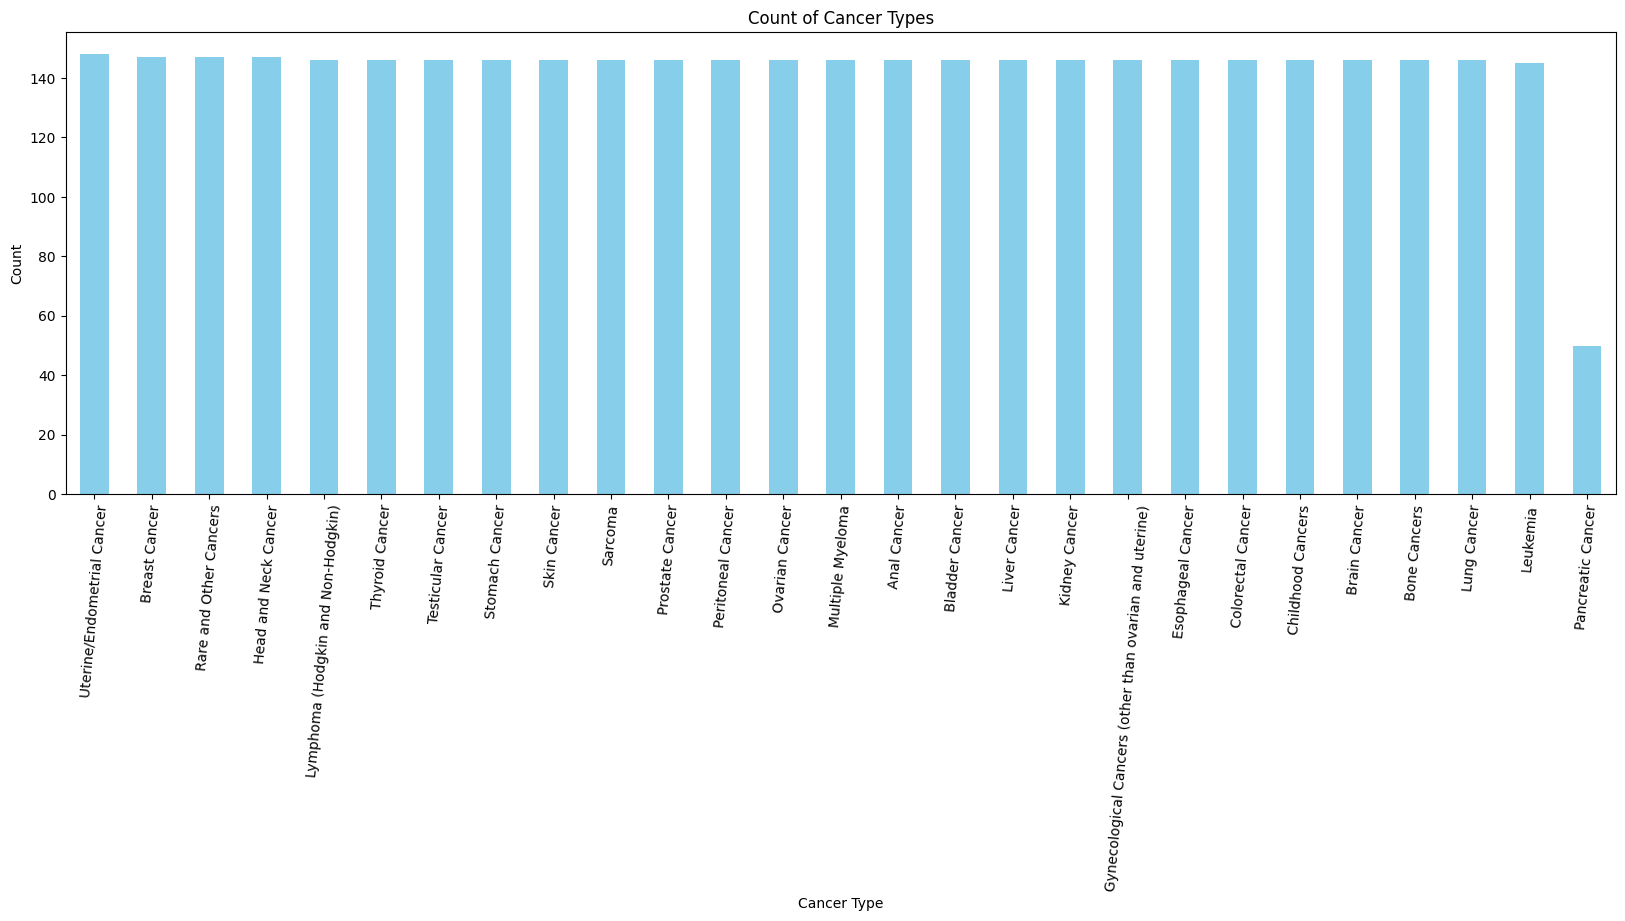

In [8]:
# Plotting
plt.figure(figsize=(20, 6))
cancer_type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

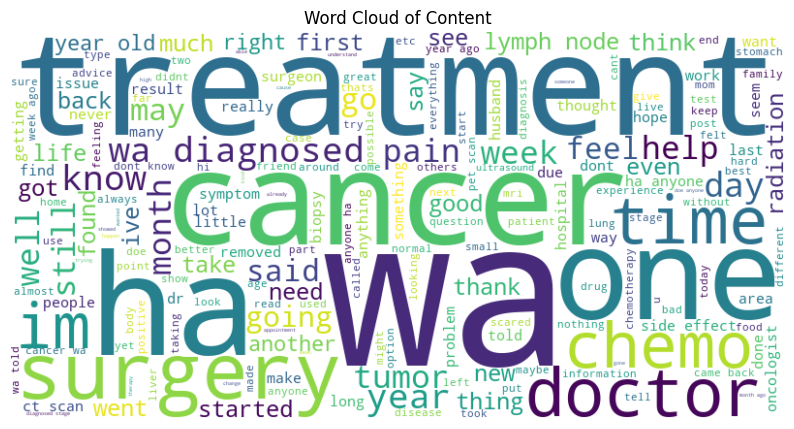

In [9]:
# Word cloud of content
from wordcloud import WordCloud

text = ' '.join(df['content'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Content')
plt.axis('off')
plt.show()

37
object


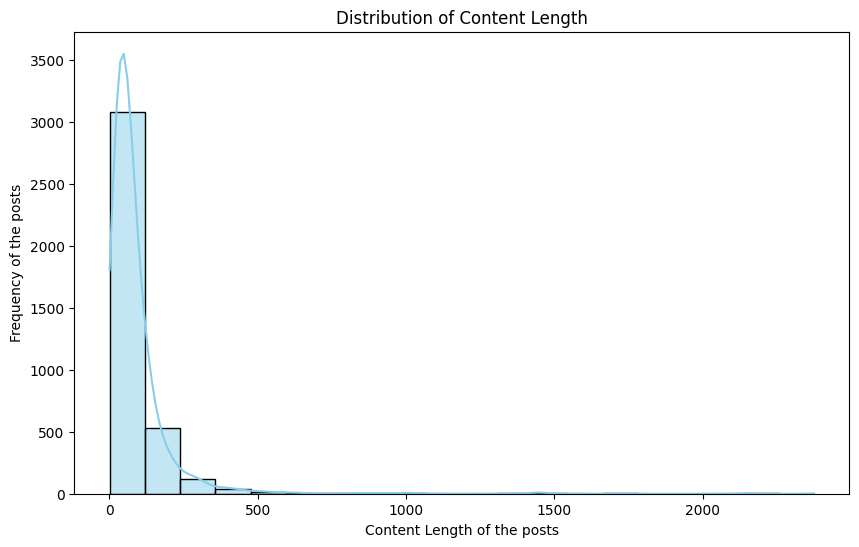

In [10]:
# Check for null values in 'content' column
print(df['content'].isnull().sum())

# Drop rows with null values in 'content' column
df = df.dropna(subset=['content'])

# Check datatype of 'content' column
print(df['content'].dtype)

# Convert 'content' to string datatype
df['content'] = df['content'].astype(str)

# Distribution of content length
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Content Length')
plt.xlabel('Content Length of the posts')
plt.ylabel('Frequency of the posts')
plt.show()

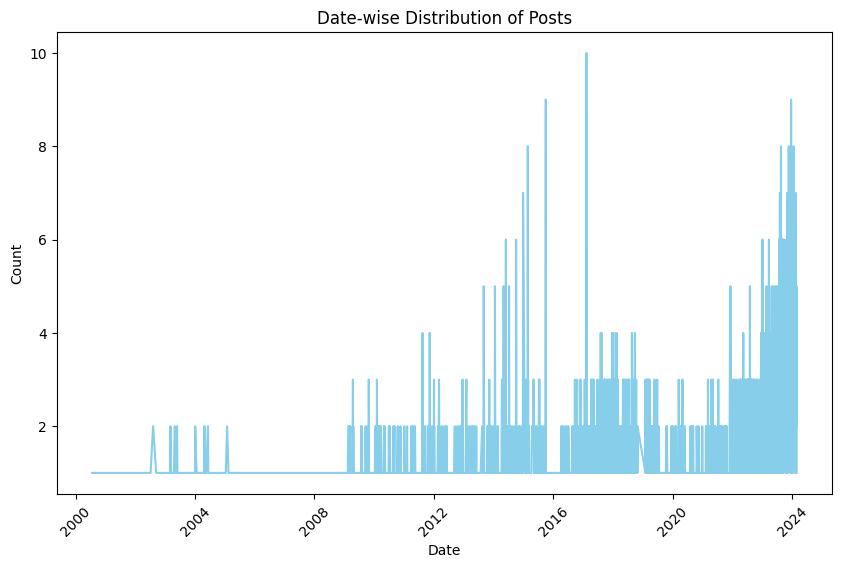

In [11]:
# Date-wise distribution of posts
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10, 6))
df['date'].dt.date.value_counts().sort_index().plot(kind='line', color='skyblue')
plt.title('Date-wise Distribution of Posts')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#By plotting the date-wise distribution of posts as a line graph, one can observe trends, spikes,
#or patterns in posting activity over the period covered by the dataset. This information can be useful
#for understanding user engagement, identifying popular posting times, or detecting anomalies in posting behavior.